# In this i am using pytorch and i am well versed in pytorch

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import copy
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [4]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [5]:
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [6]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [12]:
n_epochs = 5
batch_size = 100
batch_start = torch.arange(0, len(X_train), batch_size)

In [13]:
best_mse = np.inf
best_weights = None
history = []

In [14]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            bar.set_postfix(mse=float(loss))
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())



In [16]:

model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))

MSE: 0.57
RMSE: 0.75


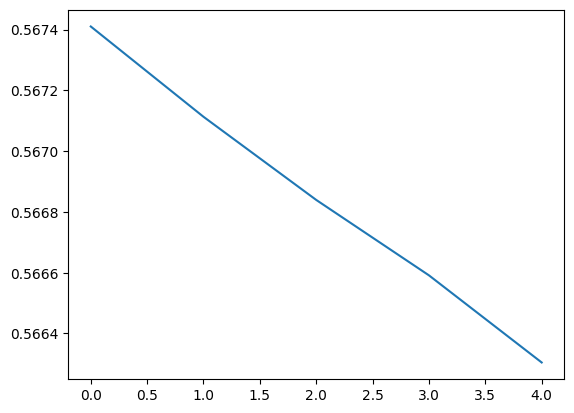

In [17]:
plt.plot(history)
plt.show()

In [18]:
# Test loop
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    mse_test = loss_fn(y_pred_test, y_test)
    mse_test = float(mse_test)

print("Test MSE: %.2f" % mse_test)
print("Test RMSE: %.2f" % np.sqrt(mse_test))



Test MSE: 0.57
Test RMSE: 0.75


In [19]:
new_data = np.array([[8.0, 40.0, 6.0, 1.5, 300.0, 2.5, 35.0, -118.0]])  # Replace with your new data
new_data_tensor = torch.tensor(new_data, dtype=torch.float32)

model.eval()
with torch.no_grad():
    new_data_prediction = model(new_data_tensor)

print("Prediction for new data:", new_data_prediction.item())

Prediction for new data: 4.171899318695068
